In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tikzplotlib as tpl


In [2]:
df = pd.read_csv('bandit_regret_exp5000.csv',  sep = ';', index_col=False)

In [3]:
# print(df.head(5))

In [4]:
experiments = [['Uncalibrated', 'DP'], ['Uncalibrated', 'EO'], ['FICO', 'DP'], ['FICO', 'EO']]
exp = ['Synthetic DP', 'Synthetic EO', 'FICO DP', 'FICO EO']

# fix
bet = 0.1
batch = 'exp'
bsize = 1

# variable
alpha = [0.25, 0.35, 0.4]

seed = [1, 2, 3, 5, 6, 7, 8, 9,10 ]

# print(dfx[(dfx['data']==e[0]) & (dfx['fair']==e[1]) & (dfx['alpha']==0.4)].shape)

In [5]:
regs={}
i = 0
# !!!!!!!!!!! chose here lin 50 or exp 1
dfx = df[(df['batch']==batch) & (df['beta'] == bet)&(df['bsize']==bsize)]
for e in experiments:
    adict = {}
    for a in alpha:
#         print(dfx[(dfx['data']==e[0]) & (dfx['fair']==e[1])])
        dfe = dfx[(dfx['data']==e[0]) & (dfx['fair']==e[1]) & (dfx['alpha']==a)]
        print(dfe.shape)
        
        A = []
        for s in seed:
            dfel = dfe[(dfe['seed']==s)]
            reg = dfel['regt'].values.squeeze()
            dfnp = np.fromstring(''+reg, dtype=np.float, sep=',')
            if s == 1 :
                A = dfnp
            else:
                A = np.vstack((A,dfnp))

        
        mean = A.mean(axis=0)
        stdev = A.std(axis=0, dtype = np.float64)
        mean = np.insert(mean, 0, 0)
        stdev = np.insert(stdev, 0, 0)
        
        adict[str(a)] = [mean, stdev]
    regs[exp[i]] = adict
    i+=1


(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)
(10, 9)


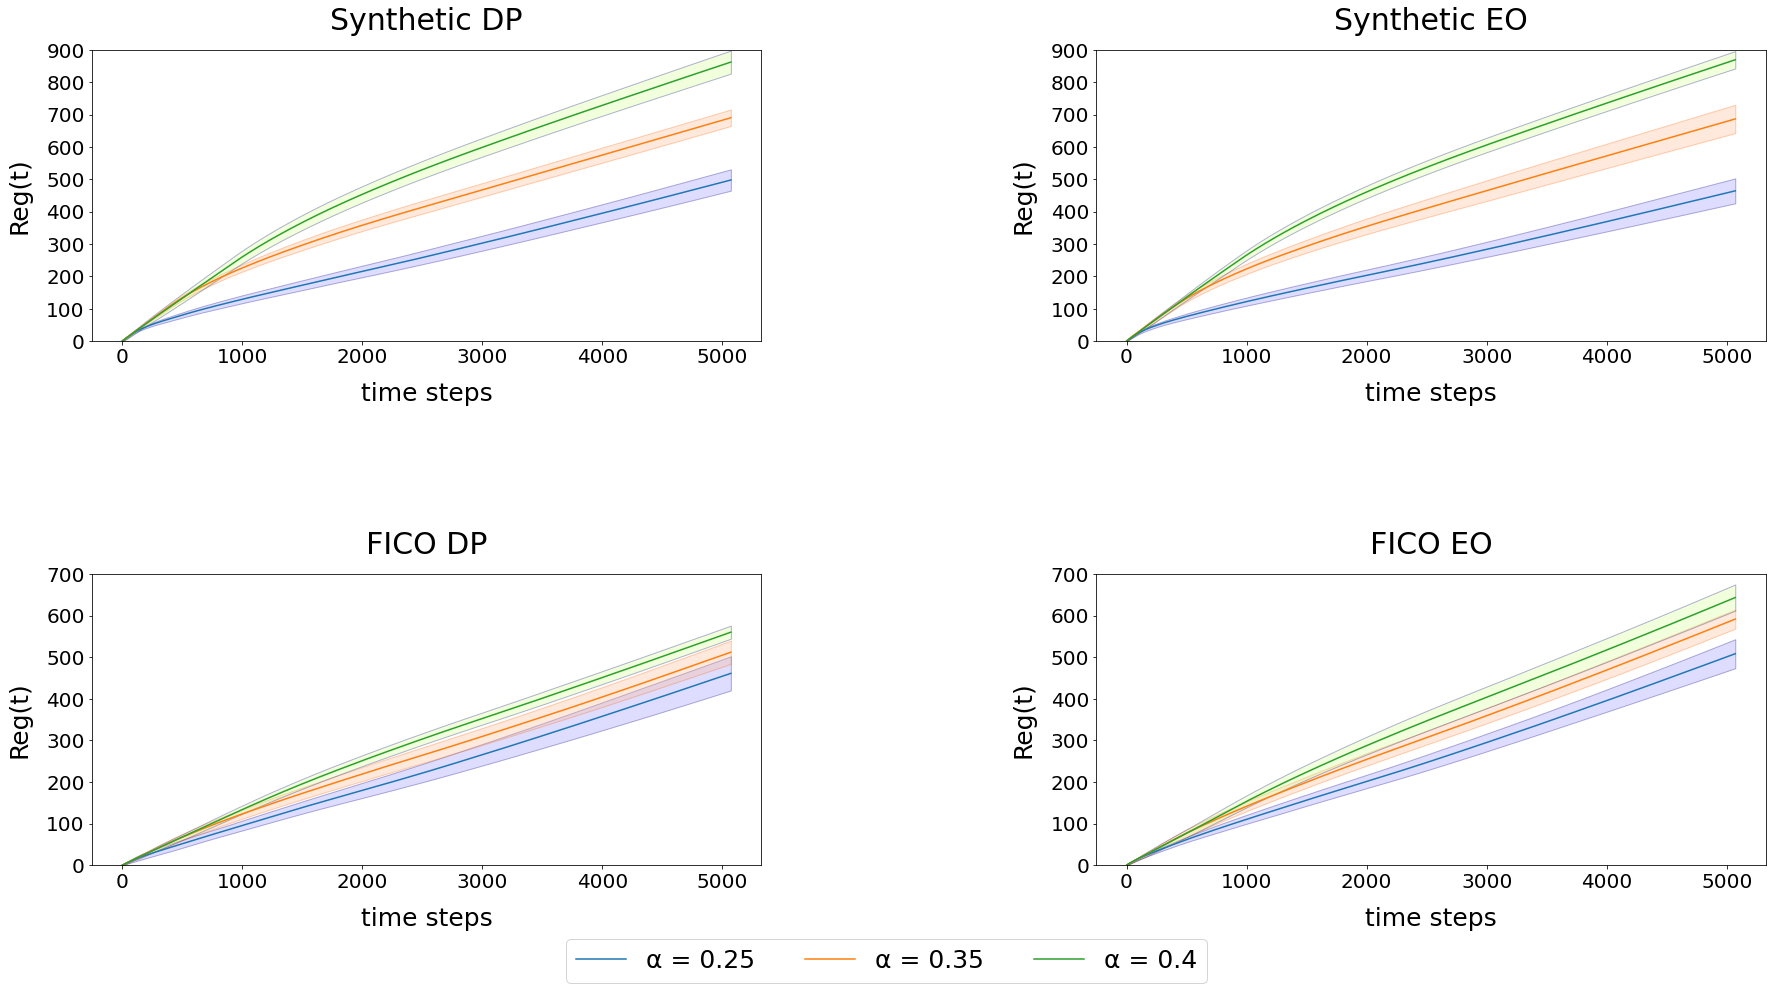

In [6]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 



x_label = "time steps"


measure_dict = regs

num_columns = 2
num_rows = 2

figure = plt.figure(figsize=(30, 15))
grid = GridSpec(nrows=num_rows, ncols=num_columns, figure=figure)
grid.update(wspace = 0.5, hspace=0.8)


current_row = 0
current_column = 0

title = ['ACC', 'FAIR']
ysetting = [[0.2,1], [0,0.8]]
ylabels = ['accuracy', 'fairness']
ysetting = [[0,900], [0,700]]

li = 0
p = 0
for key, value in measure_dict.items():
    
    axis = figure.add_subplot(grid[current_row, current_column])
    
    ecolor=['#060080','#ff6503','#060080']
    fcolor=['#928CFF','#FFB98C','#D3FF8C']
    lcolor = ['C0', 'C1', 'C2']
    
    i = 0
    for a in alpha:
        data = value[str(a)]
        # data 0 is mean, data 1 stdv
        timesteps= range(0,len(data[0]))
        if li < 3:
            axis.plot(timesteps, data[0], label=('\u03B1 = '+str(a)), color = lcolor[i])
        else:
            axis.plot(timesteps, data[0], color = lcolor[i])
        y_TQ = data[0]+data[1]
        y_FQ = data[0]-data[1]
        
        axis.fill_between(timesteps, y_FQ,
                      y_TQ,
                      alpha=0.3,
                      edgecolor=ecolor[i],
                      facecolor=fcolor[i])
        
        
        for tick in axis.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
        for tick in axis.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        
        
        if p <2:
            axis.set_ylim(ysetting[0])
        else:
            axis.set_ylim(ysetting[1])
        
        i+=1
        li +=1

    p+=1
    axis.set_xlabel(x_label, fontsize=25, labelpad =15)
    axis.set_title(key, fontsize = 30)
    axis.set_xscale("linear")
#     axis.set_ylim(0, 1000)
    axis.set_ylabel('Reg(t)', fontsize=25, labelpad = 15)


#     if plot_dict['evaluation'] == 'YES':
#         if current_column == 0 and current_row == 1:
#             axis.set_ylim(-0.5, 0.5)
#         else:
#             axis.set_ylim(0, 1)

    
    if current_column == 0 and current_row ==0:
        current_column =1
    elif current_column == 1 and current_row ==0:
        current_row =1
        current_column=0
    else:
        current_column = 1
        current_row = 1

figure.legend(loc='lower center', ncol=3, fontsize=25, frameon = True) 

base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
file_path = "{}/plot_exp2.png".format(base_save_path)
plt.savefig(file_path)
tpl.save(file_path.replace(".png", ".tex"),
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.2cm"})


plt.show()

plt.close('all')

In [7]:
# show the plot above just with accumulated unfairness roundwise

In [8]:
# reg={}
# i = 0
# # !!!!!!!!!!! chose here lin 50 or exp 1
# dfx = df[(df['batch']=='lin') & (df['beta'] == bet)&(df['bsize']==50)]
# for e in experiments:
#     adict = {}
#     for a in alpha:
# #         print(dfx[(dfx['data']==e[0]) & (dfx['fair']==e[1])])
#         dfe = dfx[(dfx['data']==e[0]) & (dfx['fair']==e[1]) & (dfx['alpha']==a)]
        
#         A = []
#         for s in seed:
#             # !!!!!!!!! here we select regT 
#             dfnp = np.fromstring(dfe['regt'].iloc[s-1], dtype=np.float, sep=',')
#             A.append(dfnp)
            
        
#         A = np.asarray(A)
        
#         mean = A.mean(axis=0)
#         stdev = A.std(axis=0, dtype = np.float64)
#         mean = np.insert(mean, 0, 0)
#         stdev = np.insert(stdev, 0, 0)
        
#         adict[str(a)] = [mean, stdev]
#     reg[exp[i]] = adict
#     i+=1


In [9]:
# x_label = "time steps"


# measure_dict = reg

# num_columns = 2
# num_rows = 2

# figure = plt.figure(figsize=(20, 20))
# grid = GridSpec(nrows=num_rows, ncols=num_columns, figure=figure)


# current_row = 0
# current_column = 0

# for key, value in measure_dict.items():
    
#     axis = figure.add_subplot(grid[current_row, current_column])
    
#     ecolor=['#060080','#ff6503','#060080']
#     fcolor=['#928CFF','#FFB98C','#D3FF8C']
#     i = 0
#     for a in alpha:
#         data = value[str(a)]
#         # data 0 is mean, data 1 stdv
#         timesteps= range(0,len(data[0]))
#         axis.plot(timesteps, data[0], label=('\u03B1 ='+str(a)))
#         y_TQ = data[0]+data[1]
#         y_FQ = data[0]-data[1]
        
#         axis.fill_between(timesteps, y_FQ,
#                       y_TQ,
#                       alpha=0.3,
#                       edgecolor=ecolor[i],
#                       facecolor=fcolor[i])
#         axis.legend(loc='upper left') 
        
#         i+=1

    
#     axis.set_xlabel(x_label)
#     axis.title.set_text(key)
#     axis.set_xscale("linear")
# #     axis.set_ylim(0, 1000)
#     axis.set_ylabel('Reg(t)')


# #     if plot_dict['evaluation'] == 'YES':
# #         if current_column == 0 and current_row == 1:
# #             axis.set_ylim(-0.5, 0.5)
# #         else:
# #             axis.set_ylim(0, 1)

    
#     if current_column == 0 and current_row ==0:
#         current_column =1
#     elif current_column == 1 and current_row ==0:
#         current_row =1
#         current_column=0
#     else:
#         current_column = 1
#         current_row = 1

# plt.show()

# base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
# file_path = "{}/plot_exp2.png".format(base_save_path)
# plt.savefig(file_path)
# tpl.save(file_path.replace(".png", ".tex"),
#          figure=figure,
#          axis_width='\\figwidth',
#          axis_height='\\figheight',
#          tex_relative_path_to_data='.',
#          extra_groupstyle_parameters={"horizontal sep=1.2cm"})
# plt.close('all')